**INTEGRANTES:**

1. **GIOVANE BRUNO NARDARI - 21000244**

2. **LEONARDO BOLELI SILVA - 21012004**

# Imports

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Definição de funções básicas

In [ ]:
SEED = 2101200421000244
INFERIOR_LIM = -1000
SUPERIOR_LIM = 1000
BAYES_INF_LIM = -50
BAYES_SUP_LIM = 50

def generate_x_values(n_samples, inf_lim = INFERIOR_LIM, sup_lim = SUPERIOR_LIM):
    return [random.uniform(inf_lim, sup_lim) for _ in range(n_samples)]

def rfbayes(inf_lim = BAYES_INF_LIM, sup_lim = BAYES_SUP_LIM):
    return random.uniform(inf_lim, sup_lim)

# Visualização inicial dos dados que serão gerados para o estudo

In [ ]:
random.seed(SEED)
dfA = pd.DataFrame({"Xa": generate_x_values(100)})
dfA["Ya"] = dfA["Xa"].apply(lambda x: 3*x - 578)
print(dfA.head())

           Xa           Ya
0 -605.925102 -2395.775307
1 -608.989020 -2404.967059
2 -178.311346 -1112.934037
3  228.132250   106.396751
4   98.957403  -281.127792


In [ ]:
random.seed(SEED)
dfB = pd.DataFrame({"Xb": generate_x_values(100)})
dfB["Yb"] = dfB["Xb"].apply(lambda x: 3*x - 578 + rfbayes())
print(dfB.head())

           Xb           Yb
0 -605.925102 -2365.216876
1 -608.989020 -2358.883358
2 -178.311346 -1149.334349
3  228.132250   119.778723
4   98.957403  -255.764871


In [ ]:
random.seed(SEED)
dfC = pd.DataFrame({f"Xc{i}":generate_x_values(100) for i in range(1, 6)})
dfC["Yc"] = dfC.apply(lambda row: row["Xc1"] + row["Xc2"] - row["Xc3"] + row["Xc4"] - row["Xc5"] + 57 + rfbayes(), axis=1)
print(dfC.head())

          Xc1         Xc2         Xc3         Xc4         Xc5           Yc
0 -605.925102  611.168637  -99.034846  430.322136  893.963949  -279.465769
1 -608.989020  921.674012  408.667811 -924.068594 -478.903612  -519.805713
2 -178.311346 -728.006226 -290.978104  195.522775   18.260969  -405.685363
3  228.132250  267.639436 -864.213610  585.097737 -439.150463  2428.469582
4   98.957403  507.258406  683.627679 -938.543586  820.562740 -1797.180757


In [ ]:
random.seed(SEED)
dfD = pd.DataFrame({"Xd": generate_x_values(100)})
dfD["Yd"] = dfD["Xd"].apply(lambda x: 4*(x**2) - 3*x + 12 + rfbayes())
print(dfD.head())

           Xd            Yd
0 -605.925102  1.470441e+06
1 -608.989020  1.485356e+06
2 -178.311346  1.276903e+05
3  228.132250  2.075183e+05
4   98.957403  3.891076e+04


# Enunciado do trabalho

**Requisitos**

Para cada uma das funções (Ya, Yb, Yc, Yd) acima realizem os seguintes experimentos, usando um perceptron com camada linear de ativação. Normalizem os dados antes de aplicar o perceptron, mas desnormalizem para conduzir as avaliações:

1. Variem a quantidade de amostras de treino, mantendo uma quantidade de épocas e de estratégia da taxa de aprendizado
2. Variem a escolha da estratégia de aprendizado,  mantendo uma quantidade de amostras e épocas fixa

Com esses experimentos, avaliem as seguintes características para cada uma das distribuições de probabilidade:

1. Como a complexidade do modelo impacta na quantidade de amostras necessárias para que o erro avaliado no treino (loss) se aproximasse do erro real?
2. A estratégia de taxa de aprendizado ajudou numa convergência mais rápida do algoritmo?
3. Evidenciem casos de underfitting, adequação e overfitting quando ocorrerem nos experimentos.

# Definição do Perceptron

In [ ]:
class Perceptron:
    def __init__(self, num_epochs = 25, learning_rate_strategy = 'fixed', initial_learning_rate = 0.2, initial_weights = 0, initial_bias = 0):
        self._num_epochs = num_epochs
        self._learning_rate_strategy = learning_rate_strategy
        self._initial_learning_rate = initial_learning_rate
        self._weights = initial_weights
        self._bias = initial_bias

    def linear_activation(self, x):
        return x

    def getLearningRateForCurrentEpoch(self, epoch):
        match self._learning_rate_strategy:
            case 'fixed':
                return self._initial_learning_rate
            case 'decaying':
                return (self._initial_learning_rate*100 - 10*(epoch/self._num_epochs))/100
            case 'adaptive':
                return self._initial_learning_rate / (epoch + 1)

    def predict(self, x):
        y = np.dot(x, self._weights) + self._bias
        return self.linear_activation(y)

    def fit(self, data, labels):
        for epoch in range(self._num_epochs):
            for x, y in zip(data, labels):
                pred = self.predict(x)
                error = pred-y
                self._bias -= self.getLearningRateForCurrentEpoch(epoch) * error
                self._weights -= self.getLearningRateForCurrentEpoch(epoch) * error * x

# Experimentação

Ajustes dos parâmetros testados abaixo:

1. Número de Épocas = 10

In [ ]:
SAMPLE_SIZES_SET = [10, 15, 20, 25, 50, 75, 100, 150, 200, 250, 500, 750, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 25000]

errors_df1 = pd.DataFrame({"sample_size": [], "modelA": [], "modelB": [], "modelC": [], "modelD": []})

for n in SAMPLE_SIZES_SET:

    random.seed(SEED)

    dfA = pd.DataFrame({"Xa": generate_x_values(n)})
    dfA["Ya"] = dfA["Xa"].apply(lambda x: 3*x - 578)

    dfB = pd.DataFrame({"Xb": generate_x_values(n)})
    dfB["Yb"] = dfB["Xb"].apply(lambda x: 3*x - 578 + rfbayes())

    dfC = pd.DataFrame({f"Xc{i}":generate_x_values(n) for i in range(1, 6)})
    dfC["Yc"] = dfC.apply(lambda row: row["Xc1"] + row["Xc2"] - row["Xc3"] + row["Xc4"] - row["Xc5"] + 57 + rfbayes(), axis=1)

    dfD = pd.DataFrame({"Xd": generate_x_values(n)})
    dfD["Yd"] = dfD["Xd"].apply(lambda x: 4*(x**2) - 3*x + 12 + rfbayes())

    errors = []

    for data in [dfA, dfB, dfC, dfD]:
        data_scaler = MinMaxScaler()
        labels_scaler = MinMaxScaler()
        normalized_data = data_scaler.fit_transform(data.values[:, :-1])
        normalized_labels = labels_scaler.fit_transform(data.values[:, -1].reshape(-1,1))

        #aplicando percetptron
        ini_weights = np.array([random.gauss(0, 0.5) for _ in range(normalized_data.shape[1])])
        classifier = Perceptron(initial_weights=ini_weights, num_epochs = 10)
        classifier.fit(normalized_data, normalized_labels)
        test_result = classifier.predict(normalized_data)

        #resultado desnormalizado
        denormalized_result = labels_scaler.inverse_transform(test_result.reshape(-1,1))
        denormalized_labels = labels_scaler.inverse_transform(normalized_labels)

        errors.append(mean_absolute_error(denormalized_labels, denormalized_result))

    errors_df1.loc[len(errors_df1)] = {"sample_size": n, "modelA": errors[0], "modelB": errors[1], "modelC": errors[2], "modelD": errors[3]}

errors_df1 = errors_df1.set_index("sample_size")
errors_df1.head()

,modelA,modelB,modelC,modelD
sample_size,,,,
10,135.964632,32.997653,301.619662,1.147144e+06
15,45.209437,49.439408,253.732692,1.448087e+06
20,21.388753,81.490134,49.333492,8.483115e+05
25,19.133664,42.808760,143.787102,9.686069e+05
50,1.807582,24.755935,66.625436,1.040685e+06


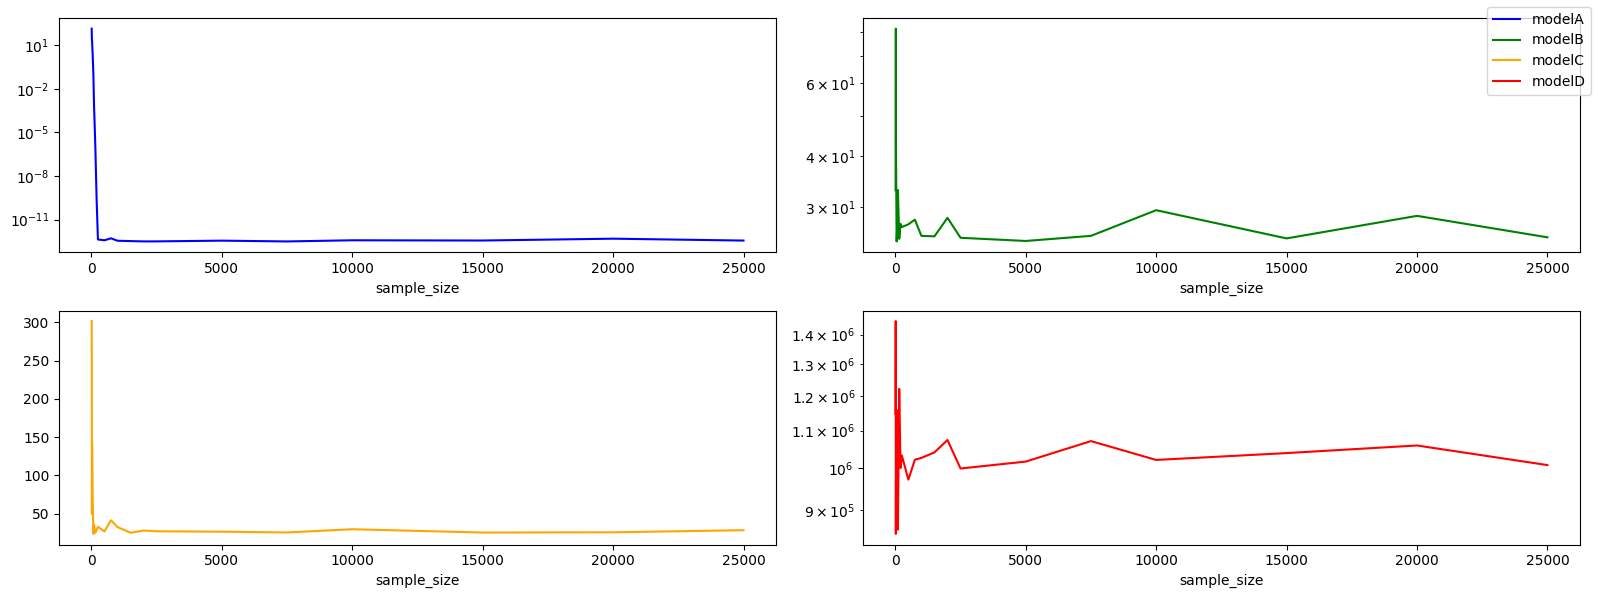

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))
errors_df1["modelA"].plot(ax=axes[0,0], color='blue', logy=True)
errors_df1["modelB"].plot(ax=axes[0,1], color='green', logy=True)
errors_df1["modelC"].plot(ax=axes[1,0], color='orange')
errors_df1["modelD"].plot(ax=axes[1,1], color='red', logy=True)
fig.legend(errors_df1.columns)
fig.tight_layout()

Ajustes dos parâmetros testados abaixo:

1. Número de Épocas = 25

In [ ]:
SAMPLE_SIZES_SET = [10, 15, 20, 25, 50, 75, 100, 150, 200, 250, 500, 750, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 25000]

errors_df1 = pd.DataFrame({"sample_size": [], "modelA": [], "modelB": [], "modelC": [], "modelD": []})

for n in SAMPLE_SIZES_SET:

    random.seed(SEED)

    dfA = pd.DataFrame({"Xa": generate_x_values(n)})
    dfA["Ya"] = dfA["Xa"].apply(lambda x: 3*x - 578)

    dfB = pd.DataFrame({"Xb": generate_x_values(n)})
    dfB["Yb"] = dfB["Xb"].apply(lambda x: 3*x - 578 + rfbayes())

    dfC = pd.DataFrame({f"Xc{i}":generate_x_values(n) for i in range(1, 6)})
    dfC["Yc"] = dfC.apply(lambda row: row["Xc1"] + row["Xc2"] - row["Xc3"] + row["Xc4"] - row["Xc5"] + 57 + rfbayes(), axis=1)

    dfD = pd.DataFrame({"Xd": generate_x_values(n)})
    dfD["Yd"] = dfD["Xd"].apply(lambda x: 4*(x**2) - 3*x + 12 + rfbayes())

    errors = []

    for data in [dfA, dfB, dfC, dfD]:
        data_scaler = MinMaxScaler()
        labels_scaler = MinMaxScaler()
        normalized_data = data_scaler.fit_transform(data.values[:, :-1])
        normalized_labels = labels_scaler.fit_transform(data.values[:, -1].reshape(-1,1))

        #aplicando percetptron
        ini_weights = np.array([random.gauss(0, 0.5) for _ in range(normalized_data.shape[1])])
        classifier = Perceptron(initial_weights=ini_weights, num_epochs = 25)
        classifier.fit(normalized_data, normalized_labels)
        test_result = classifier.predict(normalized_data)

        #resultado desnormalizado
        denormalized_result = labels_scaler.inverse_transform(test_result.reshape(-1,1))
        denormalized_labels = labels_scaler.inverse_transform(normalized_labels)

        errors.append(mean_absolute_error(denormalized_labels, denormalized_result))

    errors_df1.loc[len(errors_df1)] = {"sample_size": n, "modelA": errors[0], "modelB": errors[1], "modelC": errors[2], "modelD": errors[3]}

errors_df1 = errors_df1.set_index("sample_size")
errors_df1.head()

,modelA,modelB,modelC,modelD
sample_size,,,,
10,10.828422,24.518705,78.442271,1.142162e+06
15,0.642399,26.439815,49.725578,1.450090e+06
20,0.071112,34.067444,20.674256,8.506410e+05
25,0.021835,25.466984,26.560062,9.686413e+05
50,0.000051,24.785157,27.735567,1.040651e+06


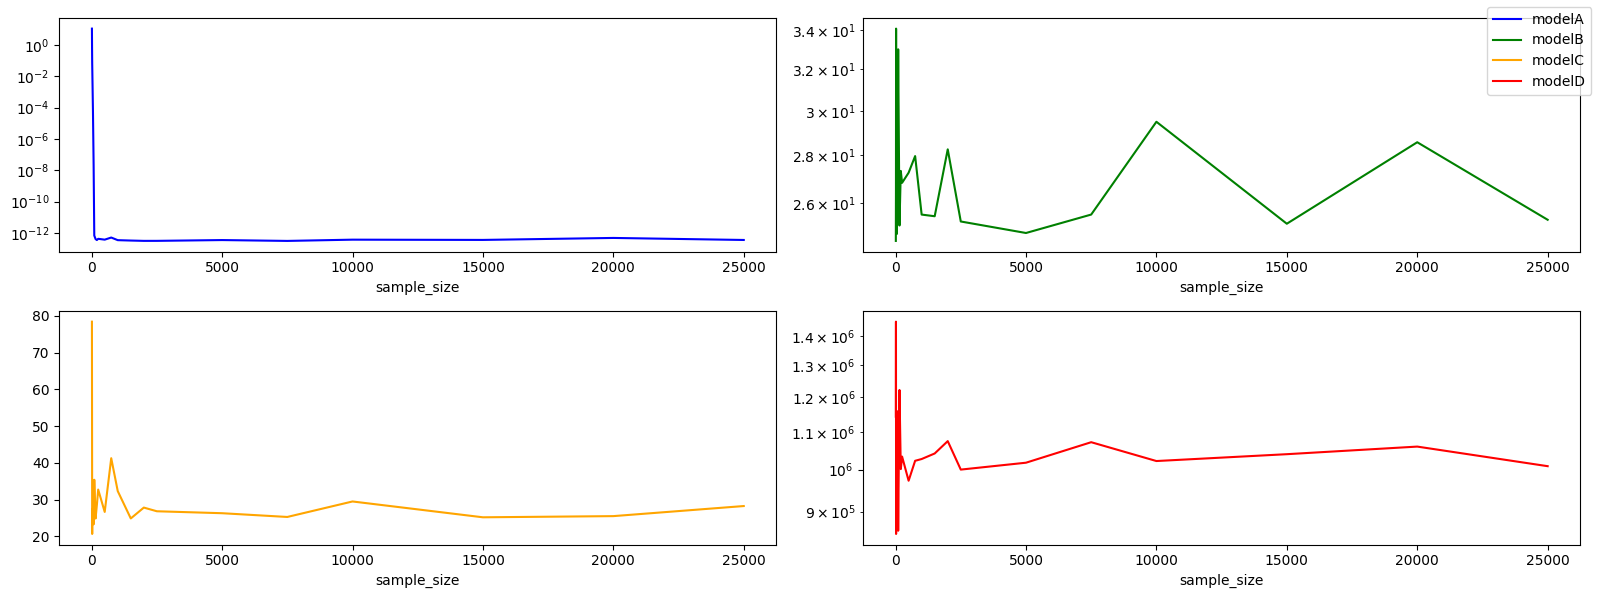

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))
errors_df1["modelA"].plot(ax=axes[0,0], color='blue', logy=True)
errors_df1["modelB"].plot(ax=axes[0,1], color='green', logy=True)
errors_df1["modelC"].plot(ax=axes[1,0], color='orange')
errors_df1["modelD"].plot(ax=axes[1,1], color='red', logy=True)
fig.legend(errors_df1.columns)
fig.tight_layout()

Ajustes dos parâmetros testados abaixo:

1. Número de Épocas = 100

In [ ]:
SAMPLE_SIZES_SET = [10, 15, 20, 25, 50, 75, 100, 150, 200, 250, 500, 750, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 25000]

errors_df1 = pd.DataFrame({"sample_size": [], "modelA": [], "modelB": [], "modelC": [], "modelD": []})

for n in SAMPLE_SIZES_SET:

    random.seed(SEED)

    dfA = pd.DataFrame({"Xa": generate_x_values(n)})
    dfA["Ya"] = dfA["Xa"].apply(lambda x: 3*x - 578)

    dfB = pd.DataFrame({"Xb": generate_x_values(n)})
    dfB["Yb"] = dfB["Xb"].apply(lambda x: 3*x - 578 + rfbayes())

    dfC = pd.DataFrame({f"Xc{i}":generate_x_values(n) for i in range(1, 6)})
    dfC["Yc"] = dfC.apply(lambda row: row["Xc1"] + row["Xc2"] - row["Xc3"] + row["Xc4"] - row["Xc5"] + 57 + rfbayes(), axis=1)

    dfD = pd.DataFrame({"Xd": generate_x_values(n)})
    dfD["Yd"] = dfD["Xd"].apply(lambda x: 4*(x**2) - 3*x + 12 + rfbayes())

    errors = []

    for data in [dfA, dfB, dfC, dfD]:
        data_scaler = MinMaxScaler()
        labels_scaler = MinMaxScaler()
        normalized_data = data_scaler.fit_transform(data.values[:, :-1])
        normalized_labels = labels_scaler.fit_transform(data.values[:, -1].reshape(-1,1))

        #aplicando percetptron
        ini_weights = np.array([random.gauss(0, 0.5) for _ in range(normalized_data.shape[1])])
        classifier = Perceptron(initial_weights=ini_weights, num_epochs = 100)
        classifier.fit(normalized_data, normalized_labels)
        test_result = classifier.predict(normalized_data)

        #resultado desnormalizado
        denormalized_result = labels_scaler.inverse_transform(test_result.reshape(-1,1))
        denormalized_labels = labels_scaler.inverse_transform(normalized_labels)

        errors.append(mean_absolute_error(denormalized_labels, denormalized_result))

    errors_df1.loc[len(errors_df1)] = {"sample_size": n, "modelA": errors[0], "modelB": errors[1], "modelC": errors[2], "modelD": errors[3]}

errors_df1 = errors_df1.set_index("sample_size")
errors_df1.head()

,modelA,modelB,modelC,modelD
sample_size,,,,
10,3.469456e-05,24.538713,23.270715,1.141833e+06
15,3.720293e-10,26.416570,20.160688,1.450121e+06
20,5.051959e-13,33.844421,20.596513,8.506744e+05
25,5.707079e-13,25.450615,20.954677,9.686414e+05
50,9.940493e-13,24.785157,27.650433,1.040651e+06


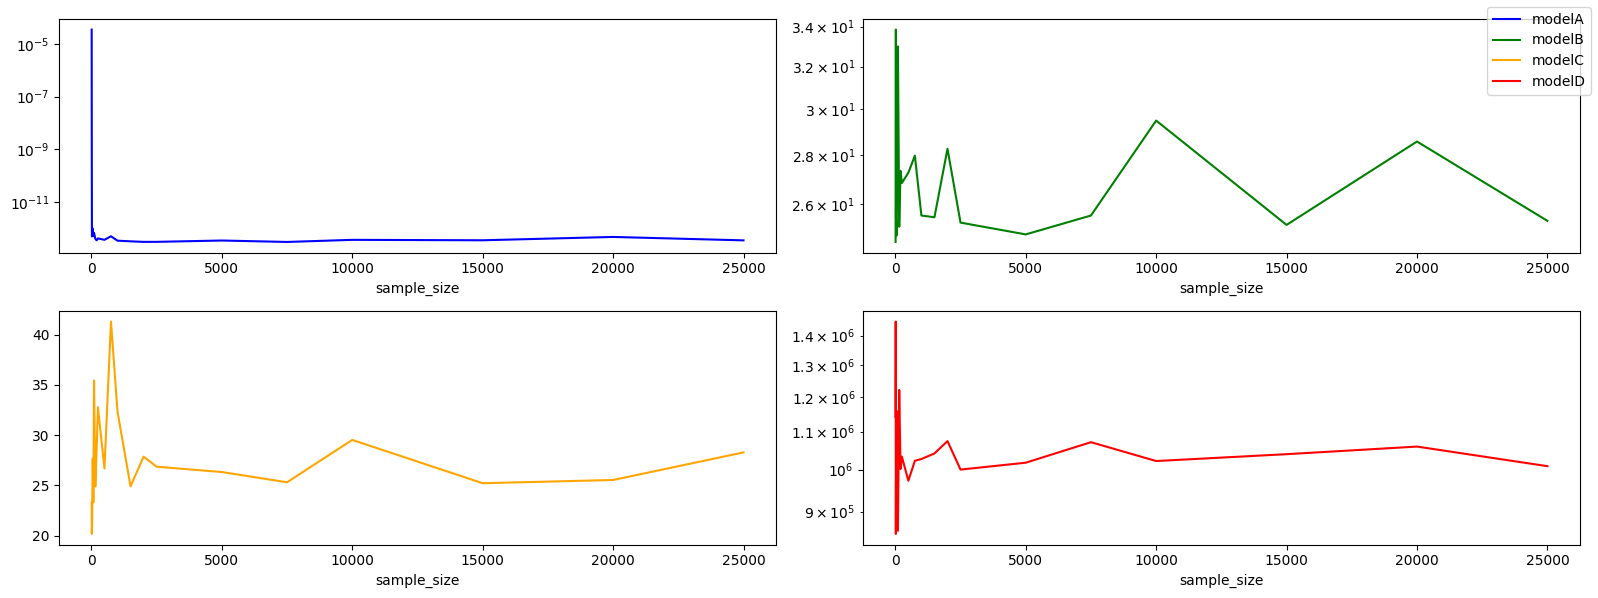

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))
errors_df1["modelA"].plot(ax=axes[0,0], color='blue', logy=True)
errors_df1["modelB"].plot(ax=axes[0,1], color='green', logy=True)
errors_df1["modelC"].plot(ax=axes[1,0], color='orange')
errors_df1["modelD"].plot(ax=axes[1,1], color='red', logy=True)
fig.legend(errors_df1.columns)
fig.tight_layout()

Variando a quantidade de amostras, fixando learning rate e número de épocas.

Ajustes dos parâmetros testados abaixo:


1. Initial Learning Rate = 0.2

2. Número de Épocas = 25

In [ ]:
SAMPLE_SIZES_SET = [10, 15, 20, 25, 50, 75, 100, 150, 200, 250, 500, 750, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 25000]

errors_df1 = pd.DataFrame({"sample_size": [], "modelA": [], "modelB": [], "modelC": [], "modelD": []})

for n in SAMPLE_SIZES_SET:

    random.seed(SEED)

    dfA = pd.DataFrame({"Xa": generate_x_values(n)})
    dfA["Ya"] = dfA["Xa"].apply(lambda x: 3*x - 578)

    dfB = pd.DataFrame({"Xb": generate_x_values(n)})
    dfB["Yb"] = dfB["Xb"].apply(lambda x: 3*x - 578 + rfbayes())

    dfC = pd.DataFrame({f"Xc{i}":generate_x_values(n) for i in range(1, 6)})
    dfC["Yc"] = dfC.apply(lambda row: row["Xc1"] + row["Xc2"] - row["Xc3"] + row["Xc4"] - row["Xc5"] + 57 + rfbayes(), axis=1)

    dfD = pd.DataFrame({"Xd": generate_x_values(n)})
    dfD["Yd"] = dfD["Xd"].apply(lambda x: 4*(x**2) - 3*x + 12 + rfbayes())

    errors = []

    for data in [dfA, dfB, dfC, dfD]:
        data_scaler = MinMaxScaler()
        labels_scaler = MinMaxScaler()
        normalized_data = data_scaler.fit_transform(data.values[:, :-1])
        normalized_labels = labels_scaler.fit_transform(data.values[:, -1].reshape(-1,1))

        #aplicando percetptron
        ini_weights = np.array([random.gauss(0, 0.5) for _ in range(normalized_data.shape[1])])
        classifier = Perceptron(initial_weights=ini_weights)
        classifier.fit(normalized_data, normalized_labels)
        test_result = classifier.predict(normalized_data)

        #resultado desnormalizado
        denormalized_result = labels_scaler.inverse_transform(test_result.reshape(-1,1))
        denormalized_labels = labels_scaler.inverse_transform(normalized_labels)

        errors.append(mean_absolute_error(denormalized_labels, denormalized_result))

    errors_df1.loc[len(errors_df1)] = {"sample_size": n, "modelA": errors[0], "modelB": errors[1], "modelC": errors[2], "modelD": errors[3]}

errors_df1 = errors_df1.set_index("sample_size")
errors_df1.head()

,modelA,modelB,modelC,modelD
sample_size,,,,
10,10.828422,24.518705,78.442271,1.142162e+06
15,0.642399,26.439815,49.725578,1.450090e+06
20,0.071112,34.067444,20.674256,8.506410e+05
25,0.021835,25.466984,26.560062,9.686413e+05
50,0.000051,24.785157,27.735567,1.040651e+06


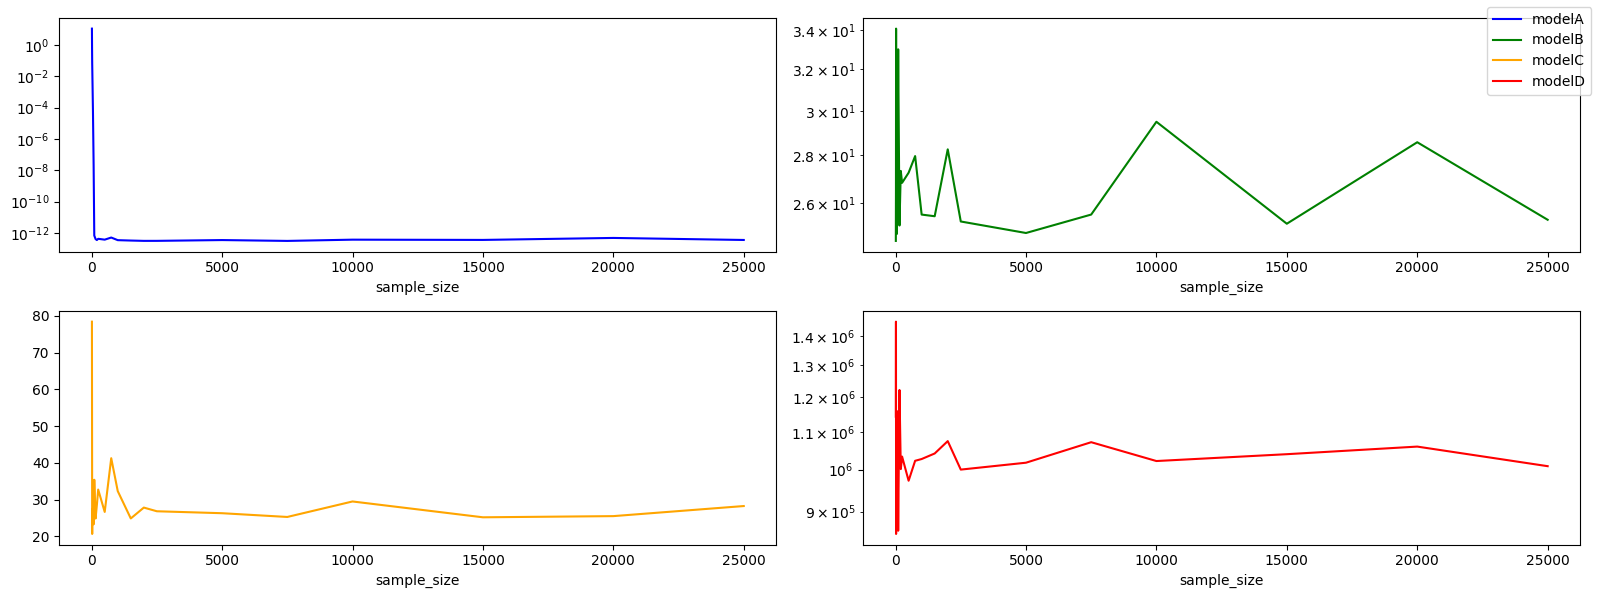

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))
errors_df1["modelA"].plot(ax=axes[0,0], color='blue', logy=True)
errors_df1["modelB"].plot(ax=axes[0,1], color='green', logy=True)
errors_df1["modelC"].plot(ax=axes[1,0], color='orange')
errors_df1["modelD"].plot(ax=axes[1,1], color='red', logy=True)
fig.legend(errors_df1.columns)
fig.tight_layout()

Ajustes dos parâmetros testados abaixo:


1. Initial Learning Rate = 0.5

2. Número de Épocas = 25

In [ ]:
SAMPLE_SIZES_SET = [10, 15, 20, 25, 50, 75, 100, 150, 200, 250, 500, 750, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 25000]

errors_df1 = pd.DataFrame({"sample_size": [], "modelA": [], "modelB": [], "modelC": [], "modelD": []})

for n in SAMPLE_SIZES_SET:

    random.seed(SEED)

    dfA = pd.DataFrame({"Xa": generate_x_values(n)})
    dfA["Ya"] = dfA["Xa"].apply(lambda x: 3*x - 578)

    dfB = pd.DataFrame({"Xb": generate_x_values(n)})
    dfB["Yb"] = dfB["Xb"].apply(lambda x: 3*x - 578 + rfbayes())

    dfC = pd.DataFrame({f"Xc{i}":generate_x_values(n) for i in range(1, 6)})
    dfC["Yc"] = dfC.apply(lambda row: row["Xc1"] + row["Xc2"] - row["Xc3"] + row["Xc4"] - row["Xc5"] + 57 + rfbayes(), axis=1)

    dfD = pd.DataFrame({"Xd": generate_x_values(n)})
    dfD["Yd"] = dfD["Xd"].apply(lambda x: 4*(x**2) - 3*x + 12 + rfbayes())

    errors = []

    for data in [dfA, dfB, dfC, dfD]:
        data_scaler = MinMaxScaler()
        labels_scaler = MinMaxScaler()
        normalized_data = data_scaler.fit_transform(data.values[:, :-1])
        normalized_labels = labels_scaler.fit_transform(data.values[:, -1].reshape(-1,1))

        #aplicando percetptron
        ini_weights = np.array([random.gauss(0, 0.5) for _ in range(normalized_data.shape[1])])
        classifier = Perceptron(initial_weights=ini_weights, initial_learning_rate = 0.5)
        classifier.fit(normalized_data, normalized_labels)
        test_result = classifier.predict(normalized_data)

        #resultado desnormalizado
        denormalized_result = labels_scaler.inverse_transform(test_result.reshape(-1,1))
        denormalized_labels = labels_scaler.inverse_transform(normalized_labels)

        errors.append(mean_absolute_error(denormalized_labels, denormalized_result))

    errors_df1.loc[len(errors_df1)] = {"sample_size": n, "modelA": errors[0], "modelB": errors[1], "modelC": errors[2], "modelD": errors[3]}

errors_df1 = errors_df1.set_index("sample_size")
errors_df1.head()

,modelA,modelB,modelC,modelD
sample_size,,,,
10,4.376856e-02,25.560957,115.488149,1.173652e+06
15,1.221842e-05,27.259005,81.794721,1.408138e+06
20,3.248153e-08,52.611209,24.854291,9.811114e+05
25,4.714060e-09,25.890093,40.855140,9.924492e+05
50,1.801936e-13,25.670686,52.223246,1.071009e+06


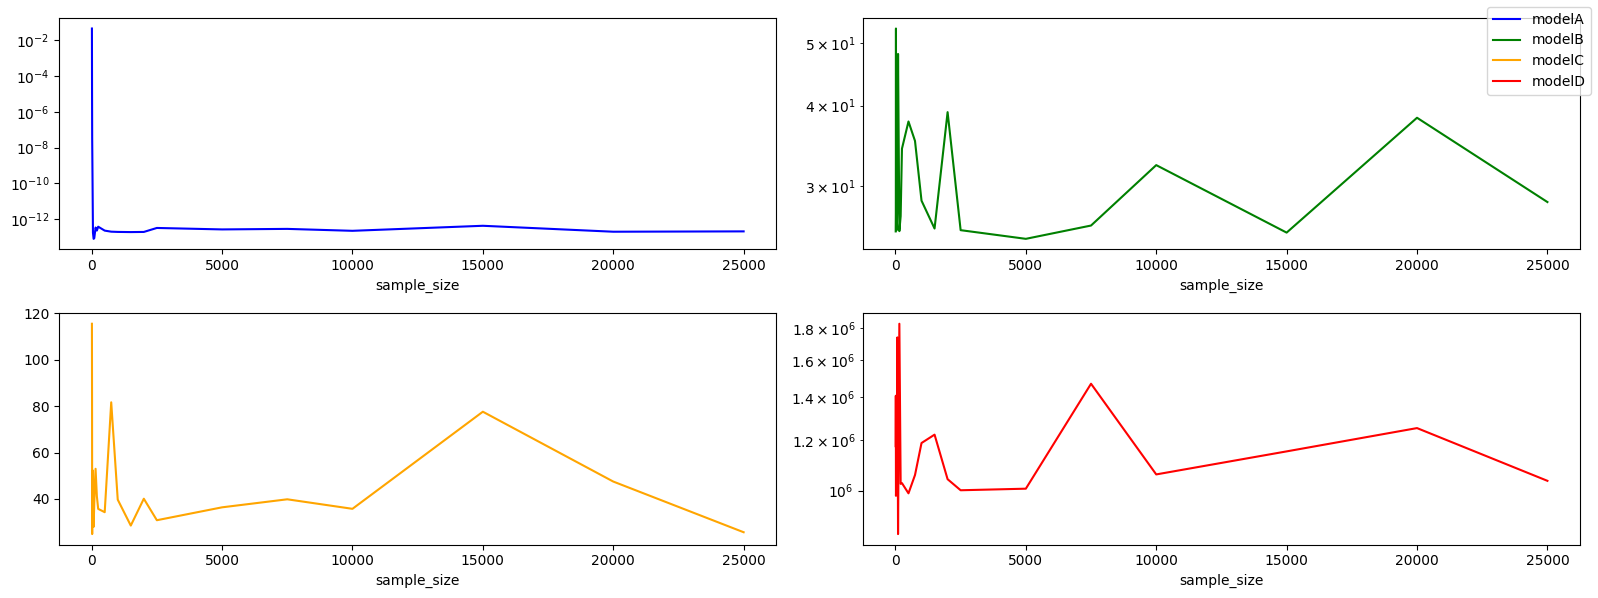

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))
errors_df1["modelA"].plot(ax=axes[0,0], color='blue', logy=True)
errors_df1["modelB"].plot(ax=axes[0,1], color='green', logy=True)
errors_df1["modelC"].plot(ax=axes[1,0], color='orange')
errors_df1["modelD"].plot(ax=axes[1,1], color='red', logy=True)
fig.legend(errors_df1.columns)
fig.tight_layout()

Variando a estratégia para o learning rate, fixando a quantidade de amostras e o número de épocas.

Ajustes dos parâmetros testados abaixo:


1. Quantidade de amostras = 5000

In [ ]:
errors_df2 = pd.DataFrame({"learning_strategy": [], "modelA": [], "modelB": [], "modelC": [], "modelD": []})

random.seed(SEED)

dfA = pd.DataFrame({"Xa": generate_x_values(5000)})
dfA["Ya"] = dfA["Xa"].apply(lambda x: 3*x - 578)

dfB = pd.DataFrame({"Xb": generate_x_values(5000)})
dfB["Yb"] = dfB["Xb"].apply(lambda x: 3*x - 578 + rfbayes())

dfC = pd.DataFrame({f"Xc{i}":generate_x_values(5000) for i in range(1, 6)})
dfC["Yc"] = dfC.apply(lambda row: row["Xc1"] + row["Xc2"] - row["Xc3"] + row["Xc4"] - row["Xc5"] + 57 + rfbayes(), axis=1)

dfD = pd.DataFrame({"Xd": generate_x_values(5000)})
dfD["Yd"] = dfD["Xd"].apply(lambda x: 4*(x**2) - 3*x + 12 + rfbayes())

for learning_strategy in ['fixed', 'decaying', 'adaptive']:

    errors = []

    for data in [dfA, dfB, dfC, dfD]:
        data_scaler = MinMaxScaler()
        labels_scaler = MinMaxScaler()
        normalized_data = data_scaler.fit_transform(data.values[:, :-1])
        normalized_labels = labels_scaler.fit_transform(data.values[:, -1].reshape(-1,1))

        #aplicando percetptron
        ini_weights = np.array([random.gauss(0, 0.5) for _ in range(normalized_data.shape[1])])
        classifier = Perceptron(learning_rate_strategy=learning_strategy, initial_learning_rate = 0.5, initial_weights=ini_weights)
        classifier.fit(normalized_data, normalized_labels)
        test_result = classifier.predict(normalized_data)

        #resultado desnormalizado
        denormalized_result = labels_scaler.inverse_transform(test_result.reshape(-1,1))
        denormalized_labels = labels_scaler.inverse_transform(normalized_labels)

        errors.append(mean_absolute_error(denormalized_labels, denormalized_result))

    errors_df2.loc[len(errors_df2)] = {"learning_strategy": learning_strategy,"modelA": errors[0], "modelB": errors[1], "modelC": errors[2], "modelD": errors[3]}

errors_df2 = errors_df2.set_index("learning_strategy")
errors_df2.head()

,modelA,modelB,modelC,modelD
learning_strategy,,,,
fixed,2.736255e-13,24.895518,36.375551,1.006695e+06
decaying,2.641668e-13,24.893493,31.563759,1.002547e+06
adaptive,2.146448e-13,24.805432,25.262069,1.045978e+06


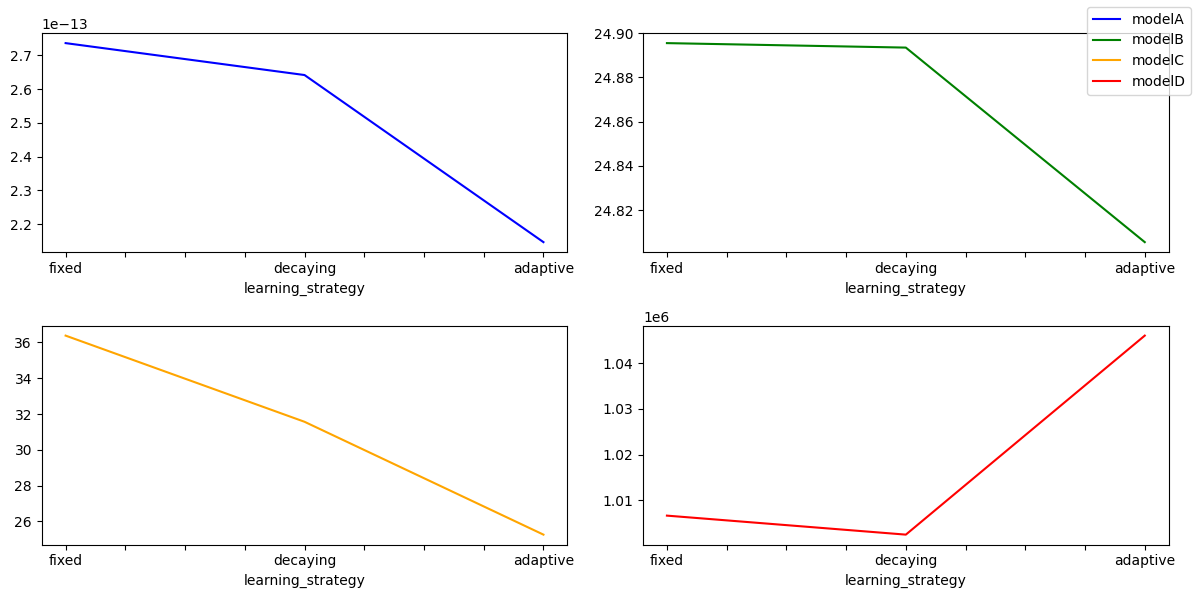

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
errors_df2["modelA"].plot(ax=axes[0,0], color='blue')
errors_df2["modelB"].plot(ax=axes[0,1], color='green')
errors_df2["modelC"].plot(ax=axes[1,0], color='orange')
errors_df2["modelD"].plot(ax=axes[1,1], color='red')
fig.legend(errors_df2.columns)
fig.tight_layout()

Ajustes dos parâmetros testados abaixo:


Quantidade de amostras = 20000

In [ ]:
errors_df2 = pd.DataFrame({"learning_strategy": [], "modelA": [], "modelB": [], "modelC": [], "modelD": []})

random.seed(SEED)

dfA = pd.DataFrame({"Xa": generate_x_values(20000)})
dfA["Ya"] = dfA["Xa"].apply(lambda x: 3*x - 578)

dfB = pd.DataFrame({"Xb": generate_x_values(20000)})
dfB["Yb"] = dfB["Xb"].apply(lambda x: 3*x - 578 + rfbayes())

dfC = pd.DataFrame({f"Xc{i}":generate_x_values(20000) for i in range(1, 6)})
dfC["Yc"] = dfC.apply(lambda row: row["Xc1"] + row["Xc2"] - row["Xc3"] + row["Xc4"] - row["Xc5"] + 57 + rfbayes(), axis=1)

dfD = pd.DataFrame({"Xd": generate_x_values(20000)})
dfD["Yd"] = dfD["Xd"].apply(lambda x: 4*(x**2) - 3*x + 12 + rfbayes())

for learning_strategy in ['fixed', 'decaying', 'adaptive']:

    errors = []

    for data in [dfA, dfB, dfC, dfD]:
        data_scaler = MinMaxScaler()
        labels_scaler = MinMaxScaler()
        normalized_data = data_scaler.fit_transform(data.values[:, :-1])
        normalized_labels = labels_scaler.fit_transform(data.values[:, -1].reshape(-1,1))

        #aplicando percetptron
        ini_weights = np.array([random.gauss(0, 0.5) for _ in range(normalized_data.shape[1])])
        classifier = Perceptron(learning_rate_strategy=learning_strategy, initial_learning_rate = 0.5, initial_weights=ini_weights)
        classifier.fit(normalized_data, normalized_labels)
        test_result = classifier.predict(normalized_data)

        #resultado desnormalizado
        denormalized_result = labels_scaler.inverse_transform(test_result.reshape(-1,1))
        denormalized_labels = labels_scaler.inverse_transform(normalized_labels)

        errors.append(mean_absolute_error(denormalized_labels, denormalized_result))

    errors_df2.loc[len(errors_df2)] = {"learning_strategy": learning_strategy,"modelA": errors[0], "modelB": errors[1], "modelC": errors[2], "modelD": errors[3]}

errors_df2 = errors_df2.set_index("learning_strategy")
errors_df2.head()

,modelA,modelB,modelC,modelD
learning_strategy,,,,
fixed,2.036510e-13,38.299759,47.487256,1.252919e+06
decaying,2.036510e-13,35.099773,33.304669,1.156543e+06
adaptive,2.082326e-13,25.028817,25.062172,1.038262e+06


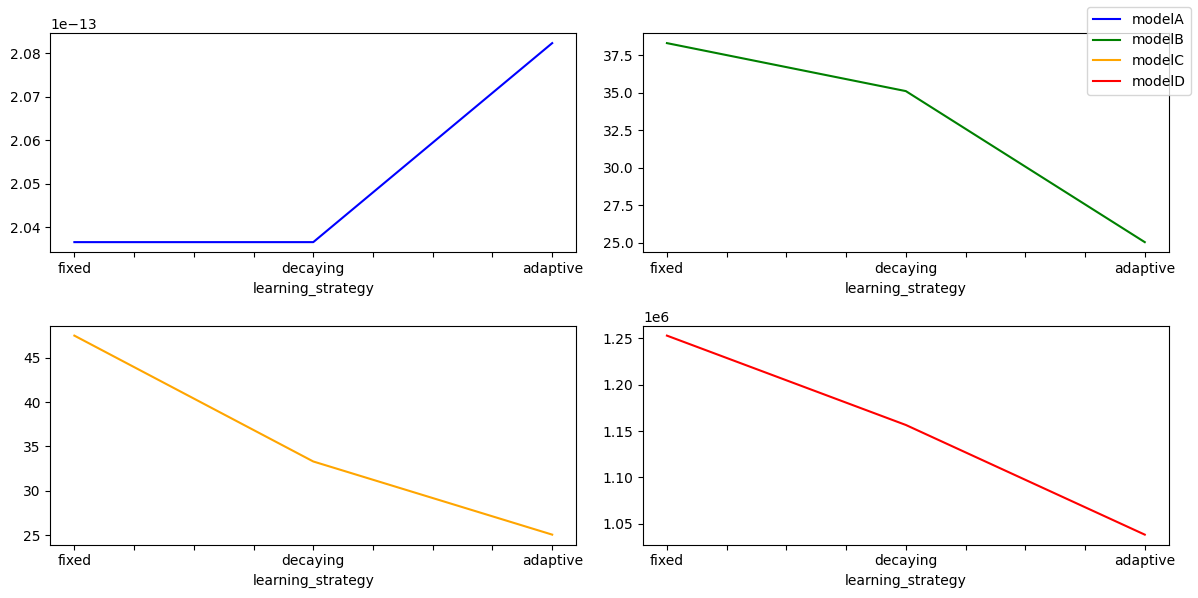

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
errors_df2["modelA"].plot(ax=axes[0,0], color='blue')
errors_df2["modelB"].plot(ax=axes[0,1], color='green')
errors_df2["modelC"].plot(ax=axes[1,0], color='orange')
errors_df2["modelD"].plot(ax=axes[1,1], color='red')
fig.legend(errors_df2.columns)
fig.tight_layout()

# Demonstração e Discussão de Resultados

In [ ]:
random.seed(SEED)

SAMPLE_SIZES_SET = [10, 20, 50, 100, 150, 200, 250, 500, 750, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 25000]

errors_df3 = pd.DataFrame({"sample_size": [], "learning_strategy": [], "modelA": [], "modelB": [], "modelC": [], "modelD": []})

for learning_strategy in ['fixed', 'decaying', 'adaptive']:

    for n in SAMPLE_SIZES_SET:

        dfA = pd.DataFrame({"Xa": generate_x_values(n)})
        dfA["Ya"] = dfA["Xa"].apply(lambda x: 3*x - 578)

        dfB = pd.DataFrame({"Xb": generate_x_values(n)})
        dfB["Yb"] = dfB["Xb"].apply(lambda x: 3*x - 578 + rfbayes())

        dfC = pd.DataFrame({f"Xc{i}":generate_x_values(n) for i in range(1, 6)})
        dfC["Yc"] = dfC.apply(lambda row: 3*row["Xc1"] + 2*row["Xc2"] - 5*row["Xc3"] + row["Xc4"] - 4*row["Xc5"] + 57 + rfbayes(), axis=1)

        dfD = pd.DataFrame({"Xd": generate_x_values(n)})
        dfD["Yd"] = dfD["Xd"].apply(lambda x: 4*(x**2) - 3*x + 12 + rfbayes())

        errors = []

        for data in [dfA, dfB, dfC, dfD]:
            data_scaler = MinMaxScaler()
            labels_scaler = MinMaxScaler()
            normalized_data = data_scaler.fit_transform(data.values[:, :-1])
            normalized_labels = labels_scaler.fit_transform(data.values[:, -1].reshape(-1,1))

            #aplicando percetptron
            ini_weights = np.array([random.gauss(0, 0.5) for _ in range(normalized_data.shape[1])])
            classifier = Perceptron(learning_rate_strategy=learning_strategy, initial_learning_rate = 0.5, initial_weights=ini_weights)
            classifier.fit(normalized_data, normalized_labels)
            test_result = classifier.predict(normalized_data)

            #resultado desnormalizado
            denormalized_result = labels_scaler.inverse_transform(test_result.reshape(-1,1))
            denormalized_labels = labels_scaler.inverse_transform(normalized_labels)

            errors.append(mean_absolute_error(denormalized_labels, denormalized_result))

        errors_df3.loc[len(errors_df3)] = {"sample_size": n, "learning_strategy": learning_strategy,"modelA": errors[0], "modelB": errors[1], "modelC": errors[2], "modelD": errors[3]}

errors_df3 = errors_df3.set_index("sample_size")
errors_df3.head()

,learning_strategy,modelA,modelB,modelC,modelD
sample_size,,,,,
10,fixed,4.376856e-02,25.560957,181.140020,1.173652e+06
20,fixed,8.991428e-07,26.650925,21.825973,1.341492e+06
50,fixed,3.601031e-13,27.356306,35.615676,9.143008e+05
100,fixed,1.843059e-13,34.004153,31.493837,1.199260e+06
150,fixed,2.496610e-13,27.772505,60.071092,1.249910e+06


In [ ]:
errors_df3.describe()

,modelA,modelB,modelC,modelD
count,5.700000e+01,57.000000,57.000000,5.700000e+01
mean,1.412597e+00,29.839061,55.155730,1.103714e+06
std,8.952332e+00,14.779651,95.481169,1.844069e+05
min,8.668906e-14,20.288812,21.825973,8.136937e+05
25%,2.020784e-13,25.305892,25.720362,1.010882e+06
50%,2.799991e-13,26.230857,32.607100,1.049755e+06
75%,4.169143e-13,28.854676,46.192494,1.153444e+06
max,6.674392e+01,133.001783,706.691624,2.027319e+06


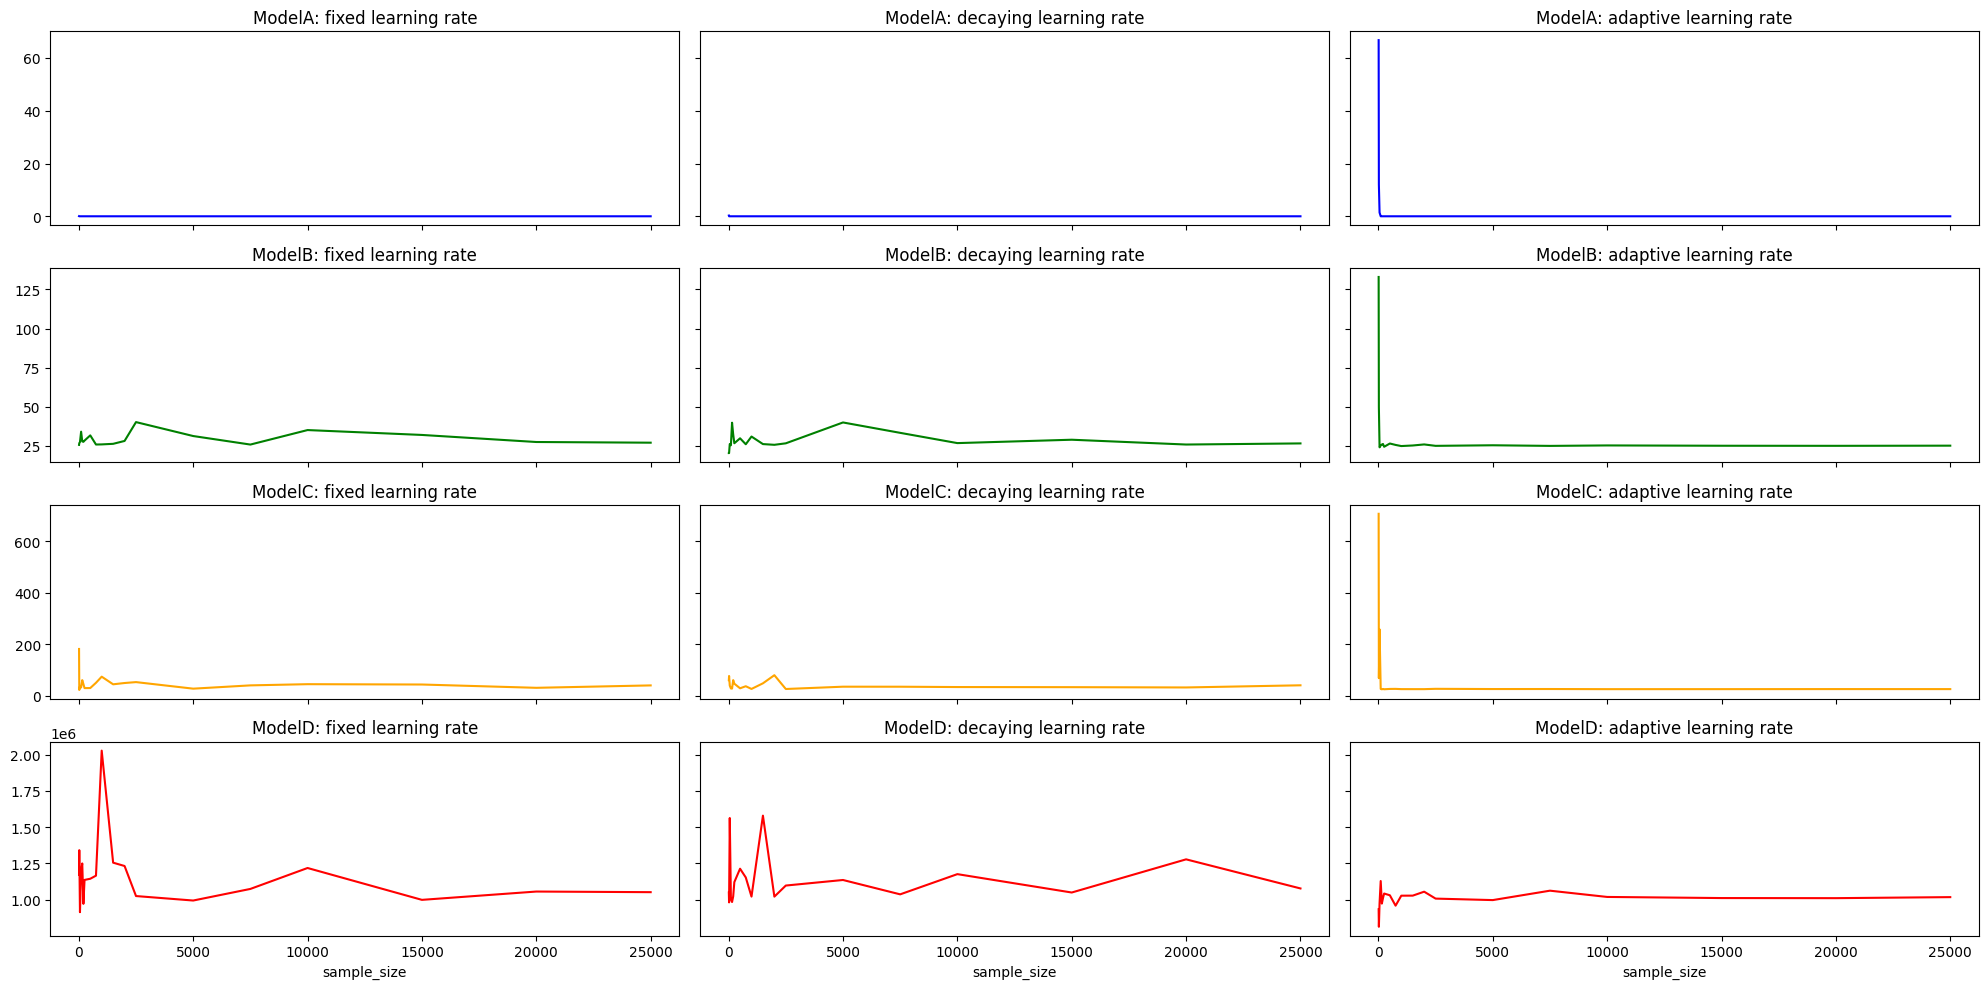

In [ ]:
df1 = errors_df3[errors_df3["learning_strategy"] == "fixed"]
df2 = errors_df3[errors_df3["learning_strategy"] == "decaying"]
df3 = errors_df3[errors_df3["learning_strategy"] == "adaptive"]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 10), sharex="all", sharey="row")

df1["modelA"].plot(ax=axes[0,0], color='blue', title='ModelA: fixed learning rate')
df2["modelA"].plot(ax=axes[0,1], color='blue', title='ModelA: decaying learning rate')
df3["modelA"].plot(ax=axes[0,2], color='blue', title='ModelA: adaptive learning rate')

df1["modelB"].plot(ax=axes[1,0], color='green', title='ModelB: fixed learning rate')
df2["modelB"].plot(ax=axes[1,1], color='green', title='ModelB: decaying learning rate')
df3["modelB"].plot(ax=axes[1,2], color='green', title='ModelB: adaptive learning rate')

df1["modelC"].plot(ax=axes[2,0], color='orange', title='ModelC: fixed learning rate')
df2["modelC"].plot(ax=axes[2,1], color='orange', title='ModelC: decaying learning rate')
df3["modelC"].plot(ax=axes[2,2], color='orange', title='ModelC: adaptive learning rate')

df1["modelD"].plot(ax=axes[3,0], color='red', title='ModelD: fixed learning rate')
df2["modelD"].plot(ax=axes[3,1], color='red', title='ModelD: decaying learning rate')
df3["modelD"].plot(ax=axes[3,2], color='red', title='ModelD: adaptive learning rate')

fig.align_ylabels()
fig.align_xlabels()
fig.tight_layout()

Com os teste acima, podemos notar os seguintes pontos:

1.  **Sobre a distribuição A:** Como essa distribuição não contém o termo "Rfbayes", que adiciona um fator de erro aleatório aos valores de Y, resta apenas uma função linear para definir Y, dessa forma a regressão linear realizada pelo perceptron consegue ser extramemente precisa (**overfitting**), de forma praticamente independente da quantidade de amostras oferecidas ao regressor e da estratégia de aprendizado utilizada pelo mesmo, dado que verifica-se uma variação mínima no erro para a mudança de ambos;

2.  **Sobre a distribuição B:** Essa distribuição mantém uma função linear para a definição de Y, porém com a adição do termo ¨Rfbayes", ou seja, adicionando um fator de erro aleatório aos valores de Y. Dessa forma, a regressão linear realizada pelo perceptron consegue ajustar-se à tendência linear dos dados, porém nunca de maneira extramemente precisa, pois o fator de erro aleatório deverá sempre induzir o algoritmo ao erro, essa observação pode ser reforçada quando observamos que os casos em que o erro absoluto médio esteve em seu ápice ainda registravam um erro absoluto médio com valores pertencentes ao intervalo determinado pelos limites utilizados para a distribuição aleatória do Rfbayes (MAE pertencente a [-50, 50]). Entretanto, também é possível observar que variando a estratégia de aprendizado do algoritmo foi possível obter ótimos resultados para essa distribuição, e.g o caso em que foi utilizada a "Adaptive Learning Rate" (**fitting** adequado), a partir de determinada quantidade de amostras oferecidas para o modelo;

3.  **Sobre a distribuição C:** Como essa distribuição é determinada por uma função linear multivariável (somada ao termo que adiciona o erro aleatório), logo supomos que o erro esperado para a predição do regressor linear seja mais elevado em comparação aos modelos anteriores, dado a necessidade de atualização de mais de um peso, principalmente nos cenários de poucas amostras. Porém, conforme cresce a quantidade de amostras oferecidas ao modelo, melhor se torna o desempenho do mesmo para essa distribuição, esse comportamento é observado de maneira similar para as três estratégias de aprendizado (**fitting** adequado).

4.  **Sobre a distribuição D:** Essa distribuição é determinada por uma função quadrática, também somada ao fator de erro aleatório, portanto o comportamento esperado para os resultados da aplicação de um regressor linear sobre esses dados seria de **underfitting**, uma vez que o modelo basicamente não tem os recurssos necessários para aprender a tendência intrínseca a uma distribuição gerada por esse tipo de função. Esse comportamento esperado é exatamente o que observamos com os testes de variação da quantidade de amostras e da estratégia de aprendizado, onde a variação de ambos surte praticamente nenhum efeito positivo sobre os resultados.
